In [1]:
import pandas as pd

In [12]:
imod_TU_range_df = pd.read_pickle("./data/imod_TU_df.pkl")
imod_TU_range_df.head()

,TRANSCRIPTION_UNIT_ID,TU range,imodulon
0,ECK120009369,"(148, 5020)",flu-yeeRS
1,ECK120009369,"(148, 5020)",fimbriae
2,ECK120009369,"(148, 5020)",thrA-KO
3,ECK120009369,"(148, 5020)",Leu/Ile
5,ECK120026504,"(5234, 5530)",Leu/Ile


In [13]:
imod_TU_range_df["TU length"] = imod_TU_range_df["TU range"].apply(lambda r: r[1] - r[0] + 1)
imod_TU_range_df.head()

,TRANSCRIPTION_UNIT_ID,TU range,imodulon,TU length
0,ECK120009369,"(148, 5020)",flu-yeeRS,4873
1,ECK120009369,"(148, 5020)",fimbriae,4873
2,ECK120009369,"(148, 5020)",thrA-KO,4873
3,ECK120009369,"(148, 5020)",Leu/Ile,4873
5,ECK120026504,"(5234, 5530)",Leu/Ile,297


In [43]:
def get_imod_len(imod):
    return imod_TU_range_df[imod_TU_range_df["imodulon"]==imod]['TU length'].sum()


imod_TU_len_d = dict()
for imod in imod_TU_range_df["imodulon"].unique():
    imod_TU_len_d[imod] = get_imod_len(imod)
imod_TU_len_df = pd.DataFrame.from_dict(imod_TU_len_d, orient="index")
imod_TU_len_df = imod_TU_len_df.rename(columns={0: "imodulon length"})
imod_TU_len_df.head()

,imodulon length
flu-yeeRS,37116
fimbriae,11948
thrA-KO,6190
Leu/Ile,38330
RpoH,42061


In [27]:
# Could be faster
all_imod_TU_pos_set = set()
for idx, tu_row in imod_TU_range_df.iterrows():
    tu_range = set(range(tu_row["TU range"][0], tu_row["TU range"][1] + 1))
    all_imod_TU_pos_set= all_imod_TU_pos_set.union(tu_range)
display(len(all_imod_TU_pos_set))

1832418

In [47]:
unknown_imod_pos_set = set(range(1 ,4641653 + 1)).difference(all_imod_TU_pos_set)
unknown_imod_nuc_len = len(unknown_imod_pos_set)
print(unknown_imod_nuc_len)
imod_TU_len_df.loc["unknown"]=unknown_imod_nuc_len
imod_TU_len_df.head()

2809235


,imodulon length
flu-yeeRS,37116
fimbriae,11948
thrA-KO,6190
Leu/Ile,38330
RpoH,42061


In [48]:
imod_TU_len_df.to_pickle("./data/imodulon_len_df.pkl")

In [34]:
E_COLI_GENOME_LEN = 4641653
unknown_pos_set = set(range(1 ,E_COLI_GENOME_LEN+1)).difference(all_imod_TU_pos_set)
unknown_nuc_len = len(unknown_pos_set)
imod_genome_cov = 1-(unknown_nuc_len/E_COLI_GENOME_LEN)

# import pickle
# with open("./data/regulon_genome_coverage.pkl", 'wb') as f:
#     pickle.dump(imod_genome_cov, f)

(0, 1)

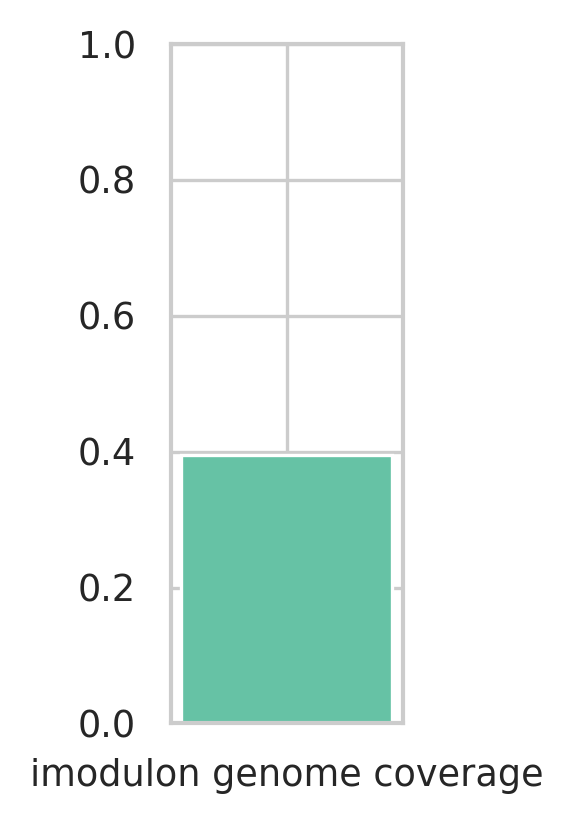

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("Set2")


plt.figure(figsize=(1,3))
plt.bar('imodulon genome coverage',
        imod_genome_cov,
        width=[0.1]
       )
plt.ylim(0, 1)